# Proyek Analisis Data: Air Quality

1.   Membuat prediksi kualitas udara dari beberapa tempat
2.   Menemukan pola dari kualitas udara di beberapa tempat
3.   Menemukan hubungan antara curah hujan dengan tingkat beberapa gas (SO2, NO2, dll)


- **Nama:** Suyanti Witono
- **Email:** suyanti.witono@bpkpenaburjakarta.or.id
- **ID Dicoding:** suyanti_witono_tfde

## Menentukan Pertanyaan Bisnis

- Bagaimana melihat pola kualitas udara dalam 1 tahun di 2 tempat?
- Bagaimana hubungan antara curah hujan dengan konsentrasi gas SO2 dan NO2 di beberapa tempat?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
gucheng_df = pd.read_csv("/content/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [5]:
huairou_df = pd.read_csv("/content/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


**Insight:**
- Dari dataset Air Quality, saya memilih 2 tabel yaitu Gucheng dan Huairou lalu mengunggah tabel tersebut ke notebook.
- Kemudian, pada fase Gathering Data ini, saya membuka kedua tabel tersebut dan menampilkan 5 data teratas.

### Assessing Data

In [6]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
gucheng_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401


In [8]:
print("Total duplicates: ", gucheng_df.duplicated().sum())

Total duplicates:  0


In [9]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


In [10]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [11]:
huairou_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


In [12]:
print("Total duplicates: ", huairou_df.duplicated().sum())

Total duplicates:  0


In [13]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


**Insight:**
- Pada kedua tabel, jumlah data tidak sama untuk setiap kolomnya. Data yang full ada di year, month, day, hour, dan station. Hal ini akan disesuaikan pada tahap "Cleaning Data".
- Semua data pada kedua tabel tidak terdapat duplikat.
- Data pada kolom CO memiliki standar deviasi yang tinggi dan range antara data min dan max terlalu besar. Hal ini kemungkinan ada data outlier yang akan ditindaklanjuti pada tahap "Cleaning Data"

### Cleaning Data

In [14]:
gucheng_df[gucheng_df['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
995,996,2013,4,11,11,NaN,30.0,8.000,19.0000,500.0,92.3202,13.8,1011.5,-13.3,0.0,NNW,1.6,Gucheng
996,997,2013,4,11,12,NaN,30.0,8.000,16.0000,NaN,97.8894,14.9,1010.4,-13.3,0.0,N,3.5,Gucheng
997,998,2013,4,11,13,NaN,27.0,7.000,13.0000,400.0,103.6728,16.4,1009.5,-13.1,0.0,NNW,2.3,Gucheng
998,999,2013,4,11,14,NaN,28.0,6.000,16.0000,400.0,103.2444,17.0,1008.7,-13.7,0.0,NE,2.7,Gucheng
999,1000,2013,4,11,15,NaN,69.0,4.284,15.1922,NaN,105.8148,17.1,1008.0,-13.7,0.0,W,3.3,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34910,34911,2017,2,22,14,NaN,NaN,NaN,NaN,NaN,NaN,2.8,1013.4,-3.8,0.0,SSE,1.9,Gucheng
34911,34912,2017,2,22,15,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1013.2,-3.1,0.0,SE,1.3,Gucheng
34912,34913,2017,2,22,16,NaN,NaN,NaN,NaN,NaN,NaN,5.1,1013.6,-3.7,0.0,N,1.3,Gucheng
34913,34914,2017,2,22,17,NaN,NaN,NaN,NaN,NaN,NaN,6.1,1014.3,-12.5,0.0,NW,4.1,Gucheng


In [15]:
gucheng_df['PM2.5'].value_counts()

,count
PM2.5,
8.0,563
11.0,544
9.0,534
10.0,526
7.0,505
...,...
741.0,1
733.0,1
675.0,1


In [16]:
gucheng_df.fillna(value=0, inplace=True)

In [17]:
gucheng_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [18]:
gucheng_df[gucheng_df.CO == gucheng_df.CO.max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33388,33389,2016,12,21,4,432.0,432.0,12.0,140.0,10000.0,7.0,-1.4,1019.9,-3.3,0.0,NNE,0.8,Gucheng
33739,33740,2017,1,4,19,571.0,679.0,15.0,270.0,10000.0,3.0,1.0,1018.7,-4.6,0.0,S,0.8,Gucheng
33744,33745,2017,1,5,0,415.0,451.0,12.0,168.0,10000.0,3.0,-1.7,1021.3,-3.4,0.0,NNE,2.1,Gucheng


**Insight:**
- Data yang kosong diganti dengan angka 0.
- Kemungkinan outlier pada kolom CO disingkirkan karena beberapa data sebelumnya juga sudah mencapai angka 9700an sehingga data 10000 (max) tidak disesuaikan lagi.

In [19]:
huairou_df[huairou_df['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
91,92,2013,3,4,19,NaN,53.0,23.0,79.0,700.0,18.0,5.6,1013.5,-12.0,0.0,W,1.6,Huairou
92,93,2013,3,4,20,NaN,92.0,30.0,90.0,1000.0,8.0,3.5,1013.7,-11.7,0.0,NW,1.6,Huairou
93,94,2013,3,4,21,NaN,100.0,24.0,54.0,1000.0,25.0,2.3,1013.7,-10.3,0.0,NW,1.0,Huairou
94,95,2013,3,4,22,NaN,85.0,22.0,54.0,900.0,21.0,2.1,1013.6,-10.8,0.0,WNW,2.2,Huairou
95,96,2013,3,4,23,NaN,74.0,18.0,47.0,900.0,91.0,1.4,1013.1,-10.8,0.0,N,0.8,Huairou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,NaN,NaN,NaN,NaN,NaN,NaN,-5.2,1023.6,-13.8,0.0,N,0.8,Huairou
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-3.6,1023.8,-15.3,0.0,NW,1.3,Huairou
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,1022.9,-15.3,0.0,ESE,1.7,Huairou
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1021.3,-14.9,0.0,SE,1.1,Huairou


In [20]:
huairou_df.fillna(value=0, inplace=True)

In [21]:
huairou_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Dilakukan hal yang sama pada tabel Huairou, dimana nilai yang kosong (NA) diganti dengan angka 0
- Kolom CO tidak disesuaikan karena data sebelumnya mendukung angka max di 10000

## Exploratory Data Analysis (EDA)

### Explore Pola Kualitas Udara di tiap tempat

In [22]:
gucheng_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.307244,117.570443,15.143978,54.806682,1271.074350,56.495370,13.844359,1007.391037,2.606645,0.064374,NaN,1.341701,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.801605,97.001487,21.130434,36.923368,1212.609147,57.021093,11.297005,39.384751,13.773323,0.838142,NaN,1.151313,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.600000,0.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,43.000000,2.000000,25.000000,500.000000,9.000000,3.600000,1000.400000,-8.900000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,98.000000,6.000000,49.000000,900.000000,43.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,166.000000,19.000000,78.000000,1600.000000,82.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


In [23]:
gucheng_df.groupby(by="year").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"],
    "NO2": ["max", "min", "mean", "std"],
    "CO": ["max", "min", "mean", "std"],
})

No  PM2.5                               PM10                   \
     nunique    max  min       mean         std    max  min        mean   
year                                                                      
2013    7344  500.0  0.0  80.482298   72.044310  983.0  0.0  111.936955   
2014    8760  770.0  0.0  87.426404   81.334157  862.0  0.0  131.936792   
2015    8760  741.0  0.0  82.042226   87.845855  941.0  0.0  114.782957   
2016    8784  646.0  0.0  76.156079   78.553379  986.0  0.0  109.575820   
2017    1416  767.0  0.0  99.900424  123.338429  994.0  0.0  124.750000   

                    SO2  ...                          NO2                  \
             std    max  ...       mean        std    max  min       mean   
year                     ...                                                
2013   83.234868  192.0  ...  17.394614  22.149959  240.0  0.0  60.649141   
2014  100.569073  500.0  ...  19.414989  26.632991  224.0  0.0  60.533767   
2015   99.668336  248.0  ...  13.187454  17.834582  216.0  0.0  48.683950   
2016   92.067547  500.0  ...  10.116803  15.015625  229.0  0.0  49.288593   
2017  136.212045  247.0  ...  20.338277  20.296686  276.0  0.0  61.183616   

                      CO                                 
            std      max  min         mean          std  
year                                                     
2013  36.736366   8000.0  0.0  1120.921977  1000.350141  
2014  39.128304   8800.0  0.0  1395.821918  1221.191236  
2015  33.549661   9900.0  0.0  1308.150685  1321.547131  
2016  34.564086  10000.0  0.0  1158.082878  1082.855017  
2017  45.576885  10000.0  0.0  1749.646893  1841.849551  

[5 rows x 21 columns]

**Insight:**
- Dilakukan pengelompokan data berdasarkan tahun untuk melihat tren kualitas udara dari gas2 SO2, NO2, CO, serta partikel berukuran kecil (PM2.5) dan sedang (PM10)

In [24]:
gucheng_df.groupby(by="year").agg({
    "No": "nunique",
    "TEMP": ["max", "min", "mean", "std"]})

No  TEMP                            
     nunique   max   min       mean        std
year                                          
2013    7344  37.7  -8.0  15.907516  10.107594
2014    8760  41.6 -10.6  14.430696  11.288686
2015    8760  39.3  -9.3  14.020805  11.124249
2016    8784  37.2 -15.6  13.528661  11.694924
2017    1416  15.5  -9.9   0.383395   4.700350

In [25]:
gucheng_df.groupby(by="year").agg({
    "No": "nunique",
    "RAIN": ["max", "min", "mean", "std"]})

No  RAIN                         
     nunique   max  min      mean       std
year                                       
2013    7344  36.6  0.0  0.070003  0.943126
2014    8760  39.0  0.0  0.036895  0.529010
2015    8760  41.9  0.0  0.080685  0.948240
2016    8784  30.4  0.0  0.080738  0.939532
2017    1416   1.3  0.0  0.002754  0.044952

**Insights**
- Data tahun 2017 jauh lebih sedikit dari data lainnya, karena itu dibuatkan dataframe baru dimana data tahun 2017 tidak diikutkan.

In [26]:
gucheng_dfrev = gucheng_df[gucheng_df['year'] != 2017]

In [27]:
gucheng_dfrev.tail(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33638,33639,2016,12,31,14,336.0,419.0,33.0,181.0,4800.0,8.0,2.9,1018.1,-8.8,0.0,SSW,2.5,Gucheng
33639,33640,2016,12,31,15,362.0,418.0,40.0,180.0,4600.0,9.0,3.5,1017.7,-8.9,0.0,SSW,1.7,Gucheng
33640,33641,2016,12,31,16,413.0,501.0,40.0,193.0,5100.0,7.0,2.8,1017.8,-7.7,0.0,S,1.5,Gucheng
33641,33642,2016,12,31,17,439.0,499.0,26.0,184.0,4800.0,14.0,1.3,1017.7,-7.2,0.0,S,1.1,Gucheng
33642,33643,2016,12,31,18,434.0,506.0,20.0,178.0,4800.0,4.0,0.3,1018.2,-7.0,0.0,SSW,1.6,Gucheng
33643,33644,2016,12,31,19,455.0,533.0,18.0,172.0,5000.0,3.0,-2.4,1018.4,-7.5,0.0,NE,0.4,Gucheng
33644,33645,2016,12,31,20,474.0,576.0,15.0,157.0,5300.0,3.0,-2.3,1018.9,-5.8,0.0,SSW,1.4,Gucheng
33645,33646,2016,12,31,21,508.0,617.0,15.0,142.0,5800.0,4.0,-2.5,1018.6,-5.6,0.0,SSW,1.6,Gucheng
33646,33647,2016,12,31,22,521.0,620.0,13.0,126.0,6200.0,4.0,-3.3,1018.9,-6.1,0.0,S,1.7,Gucheng
33647,33648,2016,12,31,23,513.0,601.0,9.0,111.0,6600.0,4.0,-4.6,1018.9,-6.7,0.0,SSE,1.3,Gucheng


In [28]:
gucheng_dfrev.to_csv('filtered_gucheng_dataset.csv', index=False)

In [29]:
gucheng_dfrev.corr(numeric_only=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.675326e-01,1.621958e-01,2.234730e-02,7.126473e-04,-0.018196,-0.036143,-0.205291,-0.118431,0.003928,-0.009052,-0.056543,0.029025,-0.027551,0.014412,0.223613
year,0.967533,1.000000e+00,-9.152387e-02,-1.537495e-03,1.223330e-15,-0.027872,-0.033571,-0.150964,-0.139803,-0.004039,0.028312,-0.072692,0.019216,-0.079718,0.010757,0.269475
month,0.162196,-9.152387e-02,1.000000e+00,8.481691e-03,2.631830e-16,0.034337,-0.015589,-0.222501,0.075931,0.029731,-0.144718,0.062549,0.038802,0.203325,0.015394,-0.171819
day,0.022347,-1.537495e-03,8.481691e-03,1.000000e+00,-7.031509e-17,0.027472,0.048471,0.004624,0.033320,0.005301,-0.013425,0.011793,0.003788,0.026023,-0.004780,-0.005227
hour,0.000713,1.223330e-15,2.631830e-16,-7.031509e-17,1.000000e+00,0.051005,0.101203,0.052391,0.002281,-0.011494,0.292262,0.142216,-0.008713,-0.007928,0.011830,0.155469
PM2.5,-0.018196,-2.787244e-02,3.433700e-02,2.747206e-02,5.100498e-02,1.000000,0.836869,0.445144,0.670635,0.730634,-0.167840,-0.142256,0.002121,0.098280,-0.019926,-0.245249
PM10,-0.036143,-3.357144e-02,-1.558927e-02,4.847123e-02,1.012033e-01,0.836869,1.000000,0.394027,0.667044,0.610379,-0.112568,-0.053619,-0.016427,0.094786,-0.032739,-0.185866
SO2,-0.205291,-1.509637e-01,-2.225012e-01,4.624164e-03,5.239058e-02,0.445144,0.394027,1.000000,0.491979,0.553003,-0.190599,-0.399253,0.075351,-0.356021,-0.042906,-0.079636
NO2,-0.118431,-1.398031e-01,7.593119e-02,3.332018e-02,2.280670e-03,0.670635,0.667044,0.491979,1.000000,0.671208,-0.480301,-0.251851,0.037907,0.003927,-0.045080,-0.419057
CO,0.003928,-4.039145e-03,2.973051e-02,5.301281e-03,-1.149430e-02,0.730634,0.610379,0.553003,0.671208,1.000000,-0.325694,-0.378478,0.059676,-0.126902,-0.018075,-0.257965


In [30]:
huairou_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,NaN,Huairou
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4943,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,67.734001,89.455481,11.782769,30.978228,981.085444,57.860925,12.427324,1006.075561,2.235236,0.067833,NaN,1.649712,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.156784,83.455233,18.737784,26.757296,903.138057,54.749752,11.752129,40.405380,14.042186,0.848384,NaN,1.199893,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.900000,0.000000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,16.000000,26.000000,2.000000,11.000000,400.000000,15.000000,2.000000,999.300000,-9.600000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,44.000000,67.000000,4.000000,24.000000,700.000000,47.000000,13.500000,1007.300000,2.600000,0.000000,NaN,1.300000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,96.000000,128.000000,13.000000,45.000000,1300.000000,81.000000,22.300000,1015.500000,15.300000,0.000000,NaN,2.000000,NaN


In [31]:
huairou_df.groupby(by="year").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"],
    "NO2": ["max", "min", "mean", "std"],
    "CO": ["max", "min", "mean", "std"],
})

No  PM2.5                              PM10                  \
     nunique    max  min       mean        std    max  min       mean   
year                                                                    
2013    7344  534.0  0.0  65.946895  65.333064  887.0  0.0  91.566040   
2014    8760  528.0  0.0  74.388539  74.435107  993.0  0.0  96.745731   
2015    8760  762.0  0.0  69.372192  73.915867  991.0  0.0  88.538059   
2016    8784  683.0  0.0  60.040528  65.070329  973.0  0.0  81.068534   
2017    1416  558.0  0.0  73.425847  90.607171  750.0  0.0  91.111582   

                    SO2  ...                          NO2                  \
             std    max  ...       mean        std    max  min       mean   
year                     ...                                                
2013   79.665069  196.0  ...  16.248531  22.141945  231.0  0.0  33.045001   
2014   83.933525  315.0  ...  16.895765  25.514481  219.0  0.0  35.615183   
2015   84.822246  314.0  ...   8.539486  12.856187  162.0  0.0  27.929578   
2016   79.155903  184.0  ...   6.527550   8.736867  189.0  0.0  26.451958   
2017  108.701421   77.0  ...   9.654661  11.088916  174.0  0.0  38.511299   

                      CO                                 
            std      max  min         mean          std  
year                                                     
2013  28.089046   8000.0  0.0   910.836057   749.673939  
2014  27.713790   6700.0  0.0  1018.424658   818.456905  
2015  24.613018  10000.0  0.0  1026.757991  1010.294535  
2016  24.444519   9300.0  0.0   906.443534   862.112254  
2017  32.195031   9800.0  0.0  1294.915254  1427.128227  

[5 rows x 21 columns]

In [32]:
huairou_df.groupby(by="year").agg({
    "No": "nunique",
    "TEMP": ["max", "min", "mean", "std"]})

No  TEMP                              
     nunique   max     min       mean        std
year                                            
2013    7344  36.9 -11.600  14.660335  10.618122
2014    8760  40.3 -14.500  12.799715  11.729890
2015    8760  39.0 -13.800  12.411462  11.598838
2016    8784  36.5 -19.900  12.395558  12.132585
2017    1416  15.8 -13.425  -1.162643   5.250704

In [33]:
huairou_df.groupby(by="year").agg({
    "No": "nunique",
    "RAIN": ["max", "min", "mean", "std"]})

No  RAIN                         
     nunique   max  min      mean       std
year                                       
2013    7344  45.9  0.0  0.072331  0.926121
2014    8760  45.9  0.0  0.052454  0.732526
2015    8760  30.9  0.0  0.080788  0.907044
2016    8784  36.1  0.0  0.076787  0.893972
2017    1416   1.0  0.0  0.003955  0.045875

**Insights**
- Data tahun 2017 lebih sedikit karena itu dibuat dataframe baru dengan tidak mengikutsertakan data tahun 2017 untuk Huairou

In [34]:
huairou_dfrev = huairou_df[huairou_df['year'] != 2017]

In [35]:
huairou_dfrev.tail(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33638,33639,2016,12,31,14,100.0,123.0,18.0,62.0,1500.0,26.0,2.8,1016.4,-13.9,0.0,WSW,2.0,Huairou
33639,33640,2016,12,31,15,88.0,106.0,21.0,65.0,1400.0,24.0,3.2,1016.1,-13.6,0.0,SE,0.4,Huairou
33640,33641,2016,12,31,16,114.0,142.0,25.0,86.0,1700.0,13.0,2.2,1016.5,-12.4,0.0,WSW,1.7,Huairou
33641,33642,2016,12,31,17,138.0,173.0,22.0,104.0,2200.0,2.0,0.3,1016.3,-12.1,0.0,NW,1.3,Huairou
33642,33643,2016,12,31,18,167.0,213.0,17.0,117.0,2900.0,2.0,-2.0,1016.7,-11.6,0.0,WNW,1.4,Huairou
33643,33644,2016,12,31,19,207.0,257.0,17.0,113.0,3600.0,2.0,-3.1,1016.9,-11.6,0.0,NNW,0.9,Huairou
33644,33645,2016,12,31,20,208.0,259.0,18.0,111.0,3400.0,2.0,-4.1,1017.3,-10.9,0.0,NW,1.6,Huairou
33645,33646,2016,12,31,21,198.0,232.0,16.0,103.0,3500.0,2.0,-4.6,1016.8,-11.0,0.0,NW,1.3,Huairou
33646,33647,2016,12,31,22,191.0,220.0,15.0,99.0,3500.0,2.0,-5.2,1017.3,-11.4,0.0,WNW,0.7,Huairou
33647,33648,2016,12,31,23,195.0,229.0,11.0,98.0,3500.0,2.0,-5.8,1017.4,-10.6,0.0,NNE,0.6,Huairou


In [36]:
huairou_dfrev.to_csv('filtered_huairou_dataset.csv', index=False)

In [37]:
huairou_dfrev.corr(numeric_only=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.675326e-01,1.621958e-01,2.234730e-02,7.126473e-04,-0.043100,-0.068510,-0.272226,-0.112416,0.009319,-0.076633,-0.048168,0.020383,-0.008628,0.008487,0.063440
year,0.967533,1.000000e+00,-9.152387e-02,-1.537495e-03,1.223330e-15,-0.039778,-0.055841,-0.221393,-0.118096,-0.004491,-0.049583,-0.065230,0.010189,-0.062124,0.005840,0.097311
month,0.162196,-9.152387e-02,1.000000e+00,8.481691e-03,2.631830e-16,-0.016365,-0.055388,-0.211176,0.014631,0.052614,-0.108592,0.066471,0.041269,0.209211,0.010808,-0.128518
day,0.022347,-1.537495e-03,8.481691e-03,1.000000e+00,-7.031509e-17,0.015032,0.034096,0.002981,0.023018,0.010180,0.008775,0.010487,-0.010498,0.025522,0.000537,-0.017720
hour,0.000713,1.223330e-15,2.631830e-16,-7.031509e-17,1.000000e+00,0.046453,0.116440,0.099976,0.141866,0.041789,0.259766,0.150995,-0.012146,-0.014286,0.013444,0.136973
PM2.5,-0.043100,-3.977818e-02,-1.636516e-02,1.503184e-02,4.645253e-02,1.000000,0.871285,0.413038,0.645561,0.782090,-0.030713,-0.086906,0.000912,0.114839,-0.012592,-0.215249
PM10,-0.068510,-5.584099e-02,-5.538825e-02,3.409587e-02,1.164396e-01,0.871285,1.000000,0.413914,0.633555,0.690301,0.049019,-0.018431,-0.019484,0.098227,-0.009572,-0.122173
SO2,-0.272226,-2.213925e-01,-2.111763e-01,2.981243e-03,9.997570e-02,0.413038,0.413914,1.000000,0.546301,0.434103,-0.044931,-0.237623,0.055814,-0.252196,-0.035727,-0.087054
NO2,-0.112416,-1.180965e-01,1.463058e-02,2.301792e-02,1.418663e-01,0.645561,0.633555,0.546301,1.000000,0.705426,-0.286666,-0.340275,0.070203,-0.174135,-0.049557,-0.260617
CO,0.009319,-4.491208e-03,5.261413e-02,1.017989e-02,4.178860e-02,0.782090,0.690301,0.434103,0.705426,1.000000,-0.194522,-0.260025,0.040475,-0.024133,-0.002899,-0.248662


### Menggabungkan kedua tabel dimana jumlah data keduanya sama.

In [38]:
mixed_df = pd.merge(gucheng_dfrev, huairou_dfrev, how='outer')

In [39]:
mixed_df.to_csv('mixed_dataset.csv', index=False)

In [40]:
mixed_df.groupby(by="station").agg({
    "No": "nunique",
    "RAIN": ["max", "min", "mean", "std"],
    "TEMP": ["max", "min", "mean", "std"],
    })

No  RAIN                           TEMP                   \
        nunique   max  min      mean       std   max   min       mean   
station                                                                 
Gucheng   33648  41.9  0.0  0.066967  0.855450  41.6 -15.6  14.410833   
Huairou   33648  45.9  0.0  0.070521  0.865898  40.3 -19.9  12.999227   

                    
               std  
station             
Gucheng  11.140809  
Huairou  11.604567

In [41]:
max_temp_by_year_Gucheng = gucheng_dfrev.loc[gucheng_dfrev.groupby(['year'])['TEMP'].idxmax()]
print(max_temp_by_year_Gucheng[['year', 'month', 'station', 'TEMP']])

       year  month  station  TEMP
3495   2013      7  Gucheng  37.7
10910  2014      5  Gucheng  41.6
20751  2015      7  Gucheng  39.3
29104  2016      6  Gucheng  37.2


In [42]:
max_temp_by_year_Huairou = huairou_dfrev.loc[huairou_dfrev.groupby(['year'])['TEMP'].idxmax()]
print(max_temp_by_year_Huairou[['year', 'month', 'station', 'TEMP']])

       year  month  station  TEMP
3496   2013      7  Huairou  36.9
10911  2014      5  Huairou  40.3
20753  2015      7  Huairou  39.0
29536  2016      7  Huairou  36.5


In [43]:
max_temp_by_year = mixed_df.loc[mixed_df.groupby(['year'])['TEMP'].idxmax()]
print(max_temp_by_year[['year', 'month', 'station', 'TEMP']])

       year  month  station  TEMP
3495   2013      7  Gucheng  37.7
10910  2014      5  Gucheng  41.6
20751  2015      7  Gucheng  39.3
29104  2016      6  Gucheng  37.2


**Insights**:
- Suhu tertinggi tiap tahun terdapat pada stasiun Gucheng.
- Suhu tertinggi tiap tahun berkisar pada bulan 5-7 (Mei-Juli), dimana suhu tertinggi pada bulan 5 tahun 2014 baik di Gucheng maupun Huairou.

In [44]:
mixed_df.corr(numeric_only=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.675326e-01,1.621958e-01,2.234730e-02,7.126473e-04,-0.029595,-0.050411,-0.235945,-0.107185,0.006101,-0.042134,-0.052159,0.024654,-0.017972,0.011432,0.138436
year,0.967533,1.000000e+00,-9.152387e-02,-1.537495e-03,1.733589e-15,-0.033194,-0.043261,-0.183498,-0.120850,-0.004148,-0.009828,-0.068738,0.014653,-0.070802,0.008283,0.177580
month,0.162196,-9.152387e-02,1.000000e+00,8.481691e-03,3.489535e-16,0.010656,-0.033557,-0.216208,0.046393,0.038694,-0.126999,0.064413,0.040039,0.206266,0.013087,-0.147487
day,0.022347,-1.537495e-03,8.481691e-03,1.000000e+00,1.059021e-17,0.021535,0.041189,0.003830,0.026810,0.007233,-0.002554,0.011103,-0.003428,0.025765,-0.002105,-0.011605
hour,0.000713,1.733589e-15,3.489535e-16,1.059021e-17,1.000000e+00,0.048560,0.106687,0.074586,0.056365,0.010982,0.276286,0.146383,-0.010445,-0.011143,0.012642,0.144113
PM2.5,-0.029595,-3.319427e-02,1.065594e-02,2.153509e-02,4.856014e-02,1.000000,0.852115,0.434932,0.646319,0.751007,-0.105377,-0.109002,0.003213,0.106640,-0.016563,-0.239340
PM10,-0.050411,-4.326130e-02,-3.355679e-02,4.118911e-02,1.066872e-01,0.852115,1.000000,0.408392,0.657298,0.647285,-0.039661,-0.026661,-0.014785,0.097168,-0.021909,-0.173151
SO2,-0.235945,-1.834983e-01,-2.162079e-01,3.830170e-03,7.458595e-02,0.434932,0.408392,1.000000,0.503359,0.507431,-0.123202,-0.314021,0.067039,-0.303584,-0.039460,-0.092895
NO2,-0.107185,-1.208502e-01,4.639274e-02,2.680950e-02,5.636502e-02,0.646319,0.657298,0.503359,1.000000,0.681378,-0.373956,-0.244928,0.054000,-0.061259,-0.044123,-0.368318
CO,0.006101,-4.147512e-03,3.869369e-02,7.232798e-03,1.098233e-02,0.751007,0.647285,0.507431,0.681378,1.000000,-0.267307,-0.310283,0.052737,-0.078723,-0.011604,-0.264150


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana melihat pola kualitas udara dalam 1 tahun di 2 tempat?

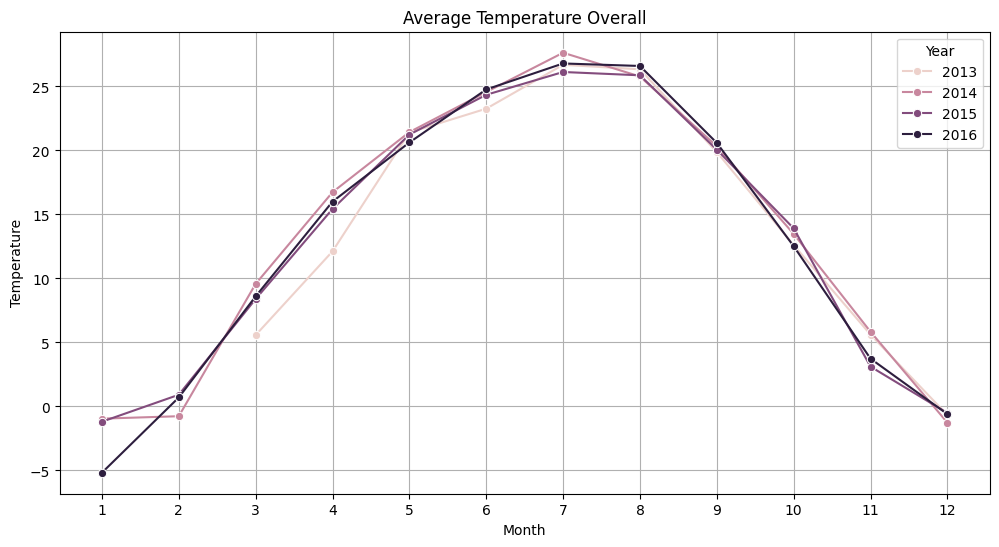

In [45]:
average_temp_by_year_month = mixed_df.groupby(['year', 'month'])['TEMP'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='TEMP', hue='year', data=average_temp_by_year_month, marker='o')
plt.title('Average Temperature Overall')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.grid(True)
plt.legend(title='Year')
plt.show()

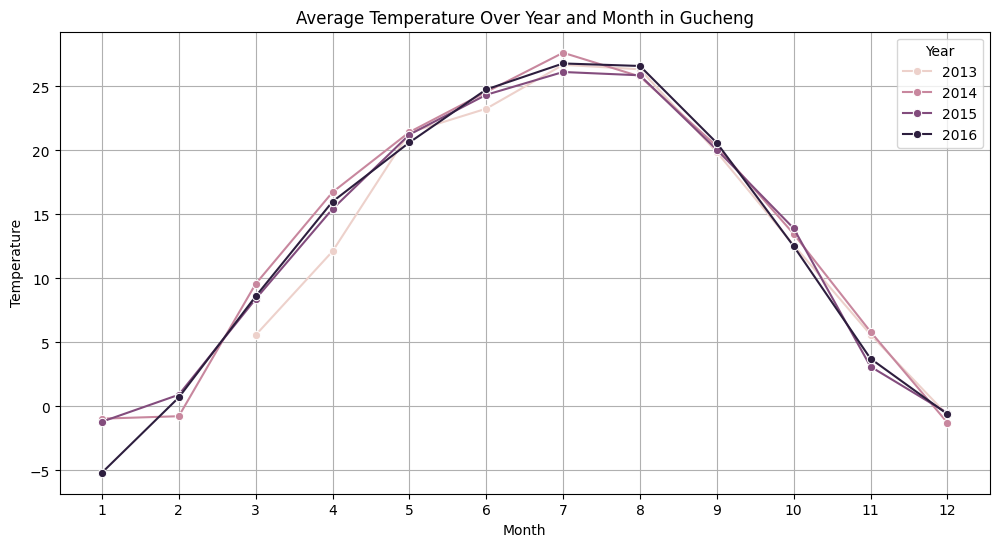

In [46]:
# Group data by year and month and calculate the average temperature
average_temp_by_year_month_Gucheng = gucheng_dfrev.groupby(['year', 'month'])['TEMP'].mean().reset_index()

# Create a line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='TEMP', hue='year', data=average_temp_by_year_month, marker='o')
plt.title('Average Temperature Over Year and Month in Gucheng')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.grid(True)
plt.legend(title='Year')
plt.show()

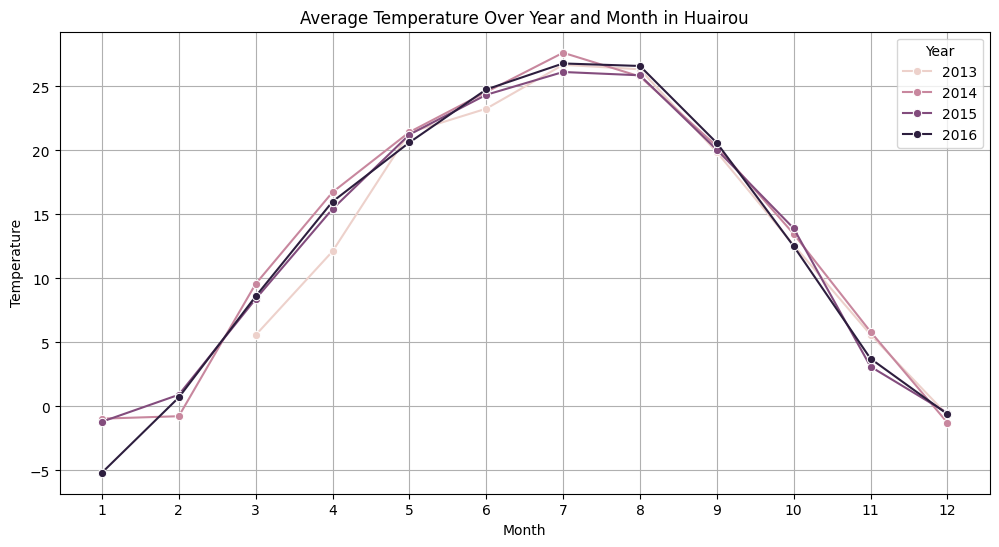

In [47]:
# Group data by year and month and calculate the average temperature
average_temp_by_year_month_Huairou = huairou_dfrev.groupby(['year', 'month'])['TEMP'].mean().reset_index()

# Create a line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='TEMP', hue='year', data=average_temp_by_year_month, marker='o')
plt.title('Average Temperature Over Year and Month in Huairou')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.grid(True)
plt.legend(title='Year')
plt.show()

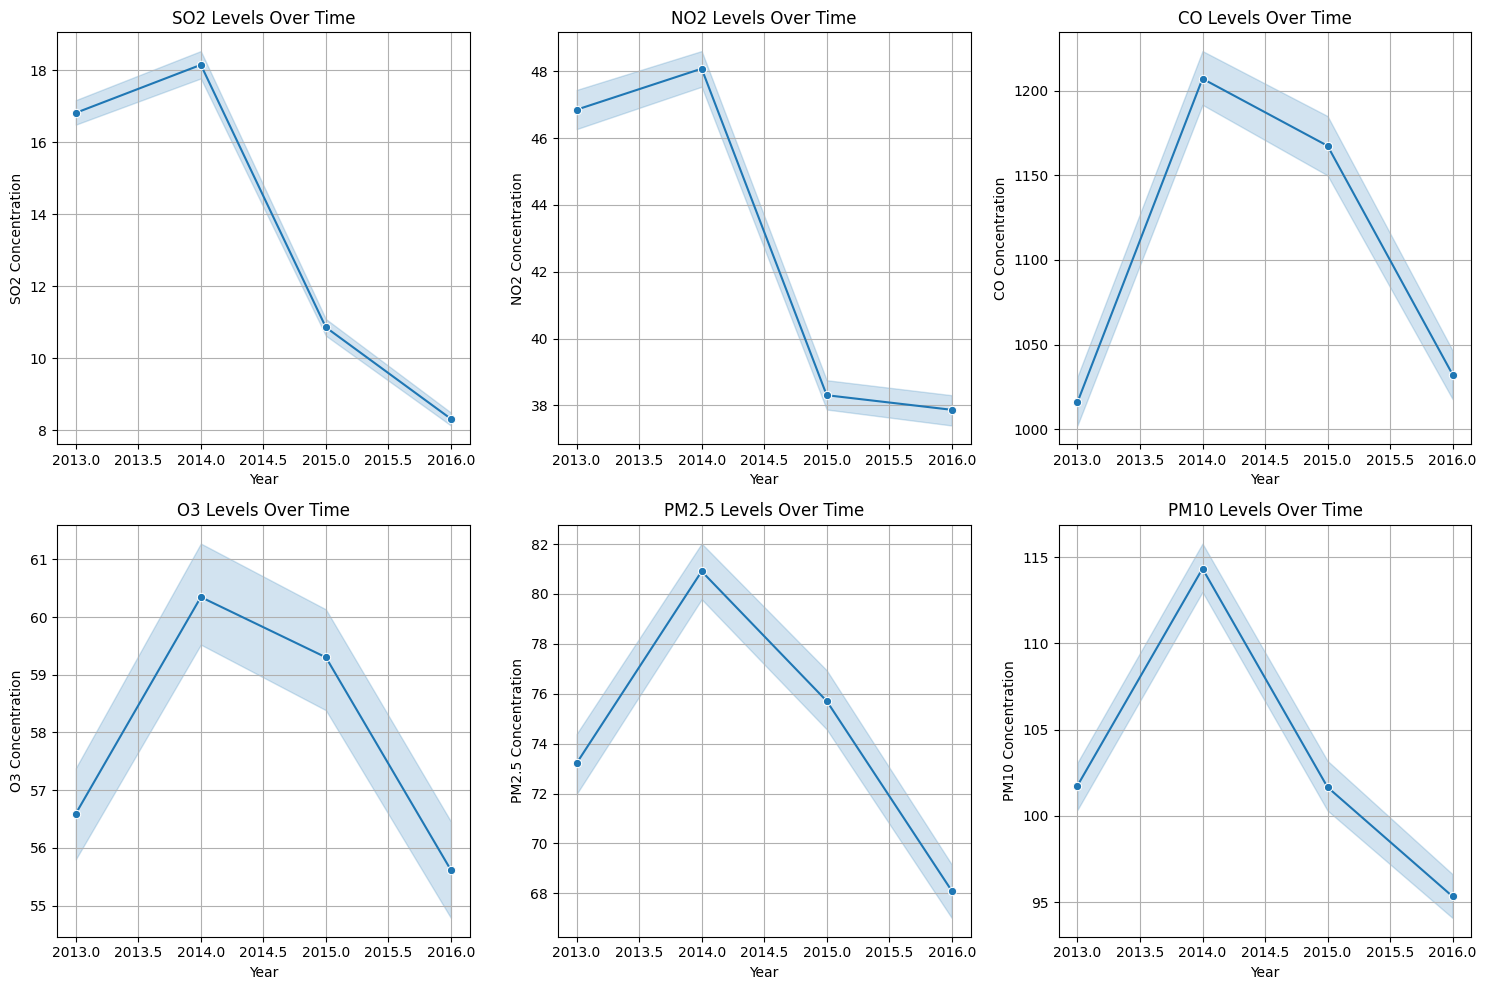

In [48]:
gases = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, gas in enumerate(gases):
    plt.subplot(2, 3, i + 1)  # Create subplots for each gas
    sns.lineplot(x='year', y=gas, data=mixed_df, marker='o')  # Use lineplot for trend
    plt.title(f'{gas} Levels Over Time')
    plt.xlabel('Year')
    plt.ylabel(gas + ' Concentration')
    plt.grid(True)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

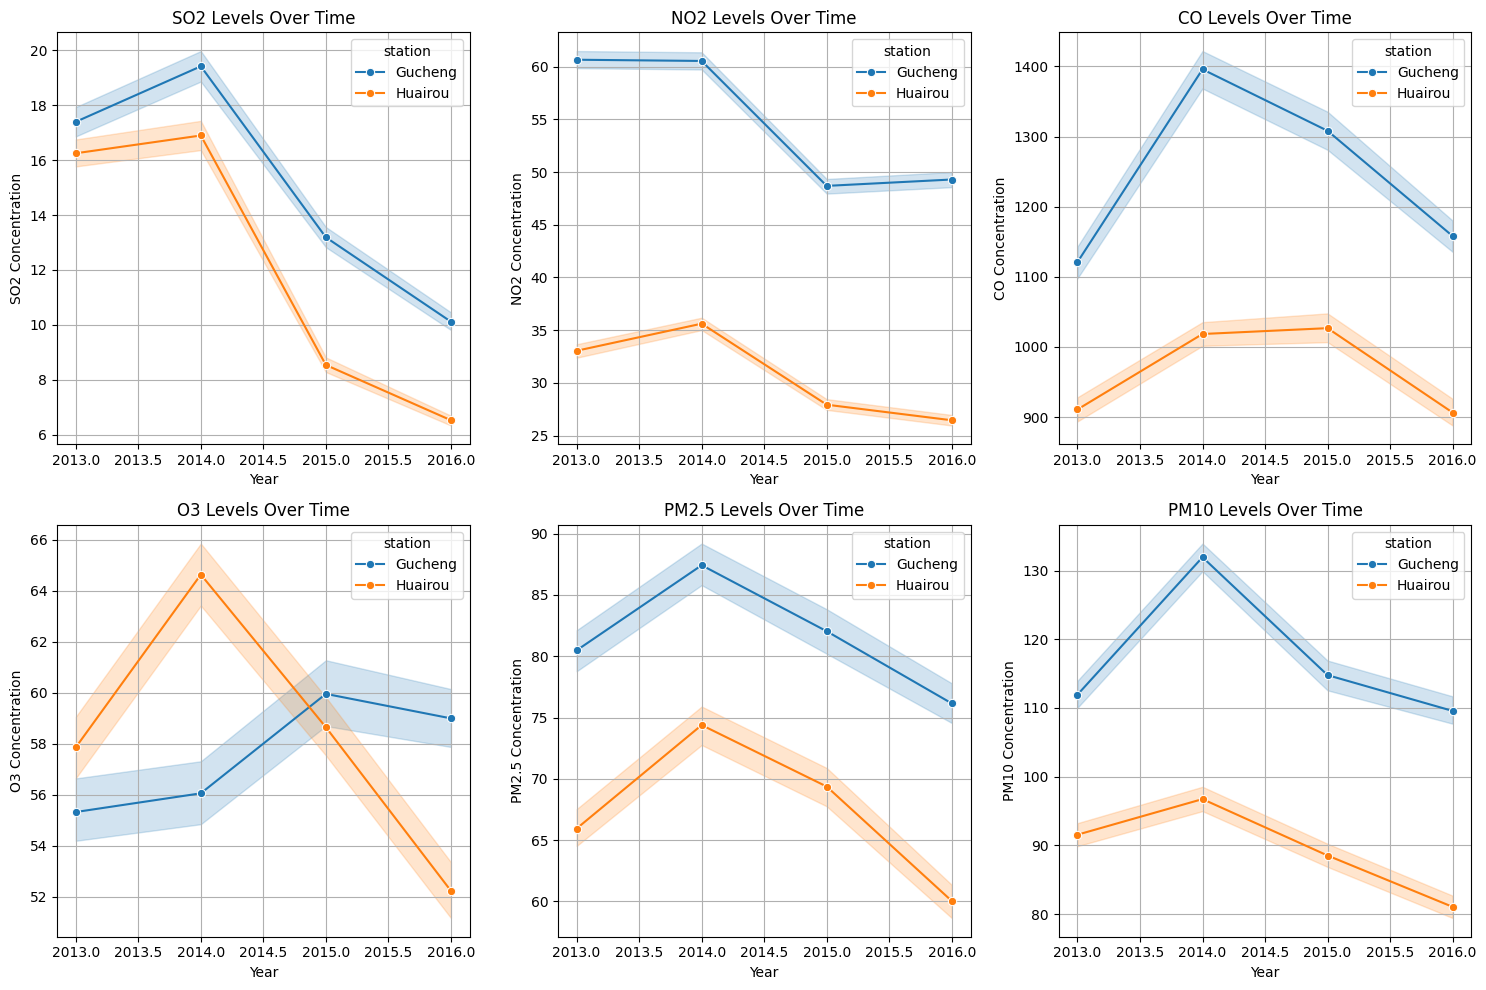

In [49]:
gases = ['SO2', 'NO2', 'CO', 'O3', 'PM2.5', 'PM10']

plt.figure(figsize=(15, 10))

for i, gas in enumerate(gases):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(x='year', y=gas, hue='station', data=mixed_df, marker='o')  # Use lineplot for trend, add hue for station
    plt.title(f'{gas} Levels Over Time')
    plt.xlabel('Year')
    plt.ylabel(gas + ' Concentration')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara curah hujan dengan konsentrasi gas SO2 dan NO2 di beberapa tempat?

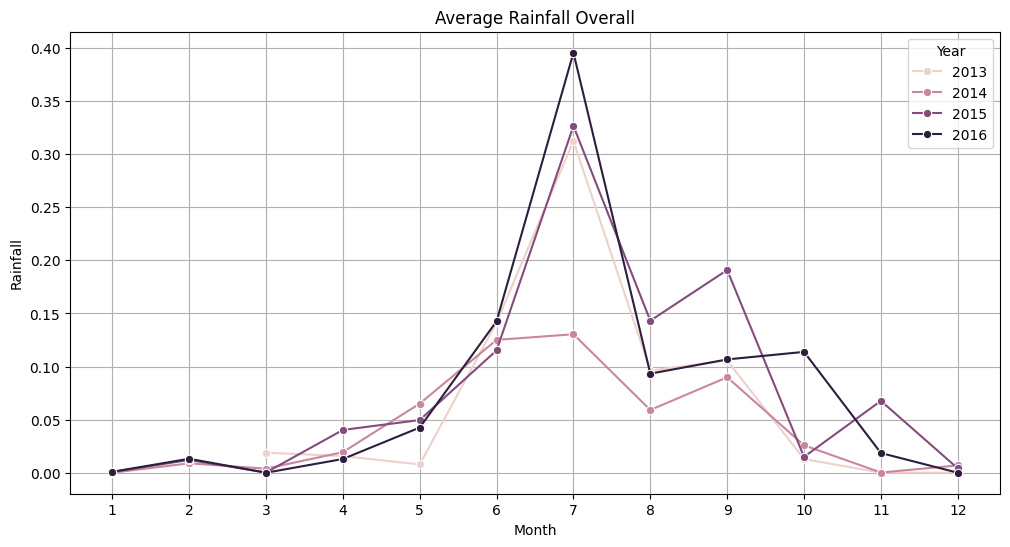

In [50]:
average_rain_by_year_month = mixed_df.groupby(['year', 'month'])['RAIN'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='RAIN', hue='year', data=average_rain_by_year_month, marker='o')
plt.title('Average Rainfall Overall')
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Year')
plt.show()

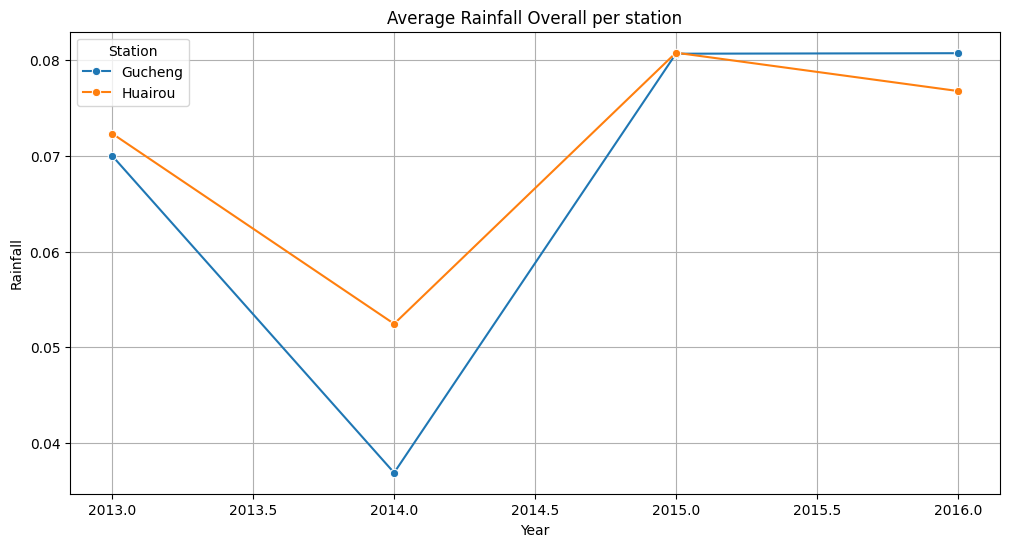

In [51]:
average_rain_by_year_station = mixed_df.groupby(['year', 'station'])['RAIN'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='RAIN', hue='station', data=average_rain_by_year_station, marker='o')
plt.title('Average Rainfall Overall per station')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.grid(True)
plt.legend(title='Station')
plt.show()

In [52]:
correlation = mixed_df[['RAIN', 'CO', 'SO2', 'NO2', 'O3']].corr(numeric_only=True)
print(correlation)

          RAIN        CO       SO2       NO2        O3
RAIN  1.000000 -0.011604 -0.039460 -0.044123  0.024326
CO   -0.011604  1.000000  0.507431  0.681378 -0.267307
SO2  -0.039460  0.507431  1.000000  0.503359 -0.123202
NO2  -0.044123  0.681378  0.503359  1.000000 -0.373956
O3    0.024326 -0.267307 -0.123202 -0.373956  1.000000


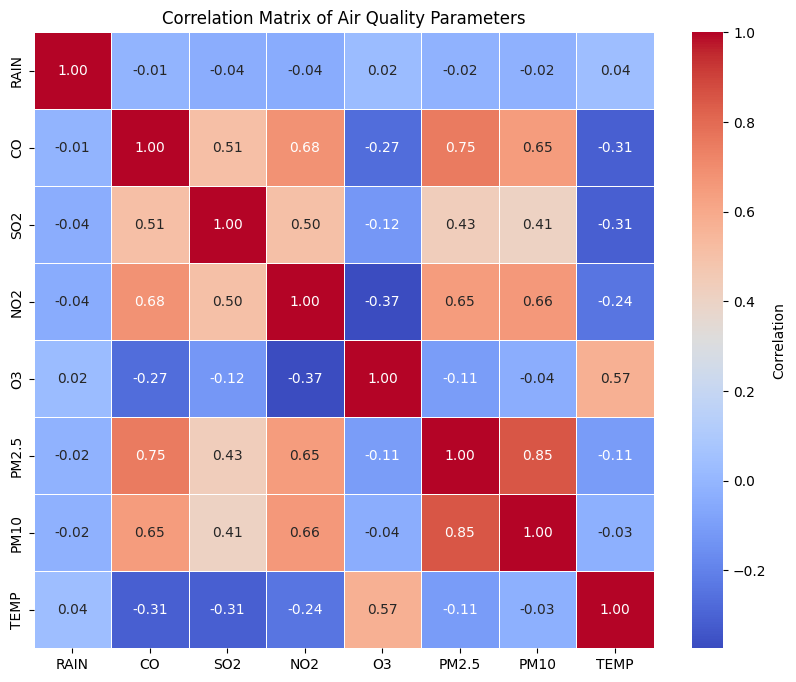

In [53]:
columns_for_correlation = ['RAIN', 'CO', 'SO2', 'NO2', 'O3', 'PM2.5', 'PM10', 'TEMP']
correlation_data = mixed_df[columns_for_correlation].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Air Quality Parameters')
plt.show()

In [54]:
correlation2 = mixed_df[['RAIN', 'TEMP']].corr(numeric_only=True)
print(correlation2)

         RAIN     TEMP
RAIN  1.00000  0.03693
TEMP  0.03693  1.00000


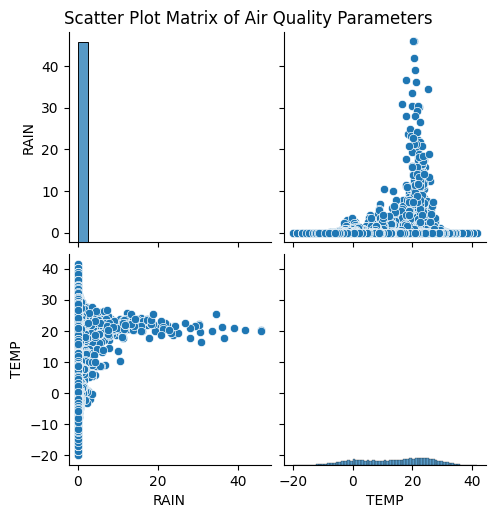

In [55]:
columns_for_scatter = ['RAIN', 'TEMP']

sns.pairplot(mixed_df[columns_for_scatter])
plt.suptitle('Scatter Plot Matrix of Air Quality Parameters', y=1.02)  # Add a title
plt.show()

**Insight:**
- Tidak ada korelasi antara curah hujan dengan gas CO, SO2, NO2 maupun O3
- Tidak ada korelasi antara curah hujan dengan temperature

## Analisis Lanjutan (Opsional)

Pada analisis lanjutan ini, saya hendak memetakan lokasi Gucheng dan Huairou pada peta China. Hal ini bertujuan untuk melihat perbedaan antara suhu (temperature) dengan curah hujan (rainfall) di kedua tempat tersebut.
Saya menggunakan teknik geopandas untuk mendapatkan gambaran data spatial. Data .shp peta didapatkan dari website Global Administrative Boundaries: https://gadm.org/
Kemudian data longitude dan latitude didapatkan dari Google Search.

In [56]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [57]:
!unzip /content/gadm41_CHN_shp.zip

Archive:  /content/gadm41_CHN_shp.zip
 extracting: gadm41_CHN_0.cpg        
  inflating: gadm41_CHN_0.dbf        
  inflating: gadm41_CHN_0.prj        
  inflating: gadm41_CHN_0.shp        
  inflating: gadm41_CHN_0.shx        
 extracting: gadm41_CHN_1.cpg        
  inflating: gadm41_CHN_1.dbf        
  inflating: gadm41_CHN_1.prj        
  inflating: gadm41_CHN_1.shp        
  inflating: gadm41_CHN_1.shx        
 extracting: gadm41_CHN_2.cpg        
  inflating: gadm41_CHN_2.dbf        
  inflating: gadm41_CHN_2.prj        
  inflating: gadm41_CHN_2.shp        
  inflating: gadm41_CHN_2.shx        
 extracting: gadm41_CHN_3.cpg        
  inflating: gadm41_CHN_3.dbf        
  inflating: gadm41_CHN_3.prj        
  inflating: gadm41_CHN_3.shp        
  inflating: gadm41_CHN_3.shx        


In [58]:
china_map = gpd.read_file('gadm41_CHN_0.shp')

In [59]:
locations_df = pd.DataFrame({'location': ['Gucheng', 'Huairou'],
                             'longitude': [100.225693, 116.6878],
                             'latitude': [26.877131, 40.3971]})

In [60]:
locations_gdf = locations_df.set_geometry(gpd.points_from_xy(locations_df.longitude, locations_df.latitude))
locations_gdf.crs = china_map.crs

In [61]:
combined_gdf = gpd.GeoDataFrame(pd.concat([china_map, locations_gdf], ignore_index=True))

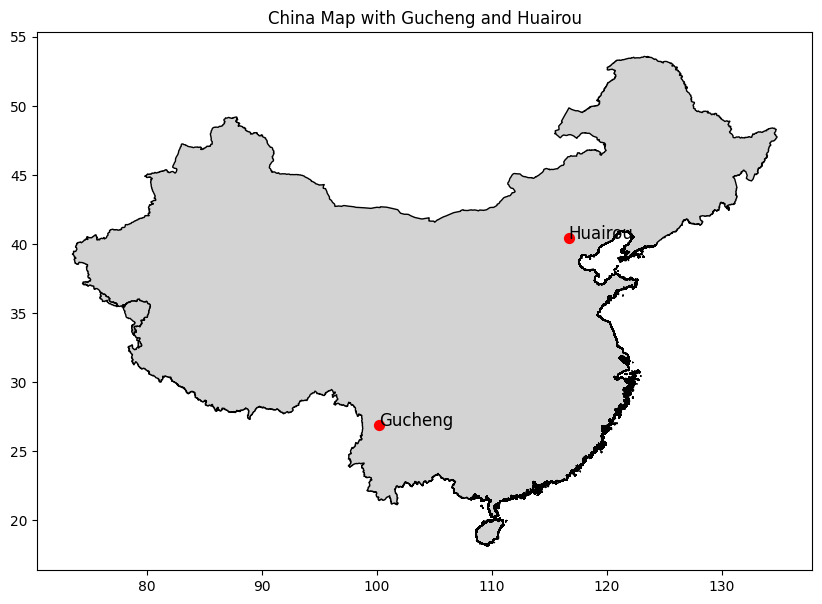

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))
china_map.plot(ax=ax, color='lightgray', edgecolor='black')
locations_gdf.plot(ax=ax, color='red', markersize=50)

# Add labels for Gucheng and Huairou
for index, row in locations_gdf.iterrows():
    plt.text(row.geometry.x, row.geometry.y, row.location, fontsize=12)

plt.title('China Map with Gucheng and Huairou')
plt.show()

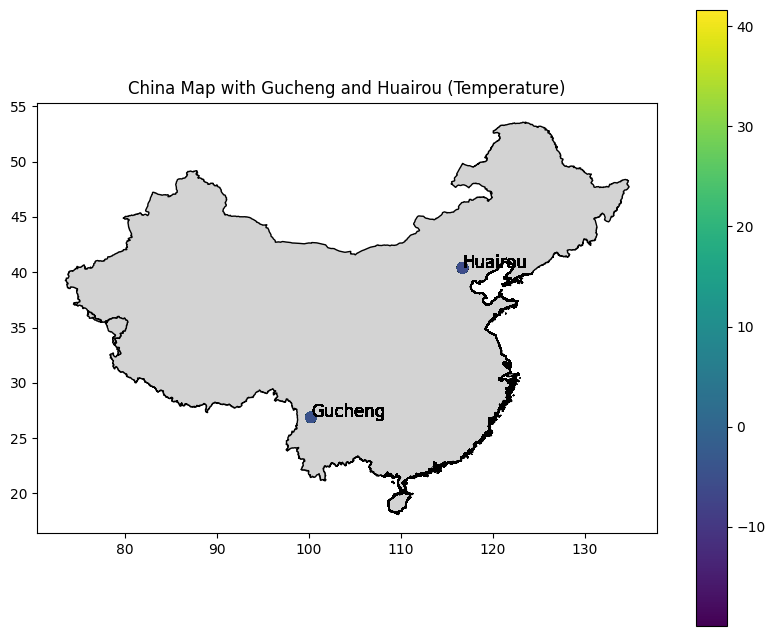

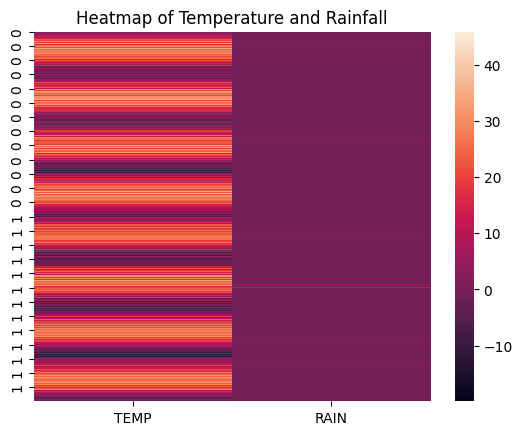

In [63]:
merged_gdf = locations_gdf.join(mixed_df.set_index('station'), on='location')

# Create a scatter plot with color-coded markers based on temperature
fig, ax = plt.subplots(figsize=(10, 8))
china_map.plot(ax=ax, color='lightgray', edgecolor='black')
merged_gdf.plot(ax=ax, column='TEMP', cmap='viridis', markersize=50, legend=True)

# Add labels for locations
for index, row in merged_gdf.iterrows():
    plt.text(row.geometry.x, row.geometry.y, row.location, fontsize=12)

plt.title('China Map with Gucheng and Huairou (Temperature)')
plt.show()

# Create a heatmap using seaborn
sns.heatmap(merged_gdf[['TEMP', 'RAIN']])
plt.title('Heatmap of Temperature and Rainfall')
plt.show()

## Conclusion

- Secara keseluruhan, jumlah partikel kecil berukuran 2.5 mikron (PM2.5) dan 10 mikron (PM10) lebih rendah di Huairou ketimbang Gucheng. Demikian pula dengan konsentrasi gas seperti SO2, NO2, dan CO. Hal ini membuktikan kualitas udara di Huairou lebih baik daripada di Gucheng.
- Pola temperature pada kedua tempat yaitu Gucheng dan Huairou cukup mirip yaitu suhu rendah pada bulan Januari lalu berangsur meningkat dan mencapai puncak pada bulan Mei-Juli kemudian suhu turun kembali sampai bulan Desember. Pola curah hujan juga cukup mirip dengan curah hujan tertinggi pada bulan Juli di kedua tempat. Akan tetapi korelasi antara temperature dan curah hujan tidak terbukti.

In [64]:
pip freeze > requirements.txt